<a href="https://colab.research.google.com/github/MustofAhmed41/Exercise-Pattern-Prediction/blob/master/Exercise_Pattern_Prediction_CheckPoint_1_Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO : Standardization, Stratified K-fold, models, Oversampling, Feature Selection

### Importing Library

In [2]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd'/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1'

/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1


### Loading Data

In [5]:
#df = pd.read_excel('pml-training.xlsx', index_col=False).drop('Row Number', axis=1).reset_index(drop=True)
#df = pd.read_excel('exercise_full_dataset.xlsx').reset_index(drop=True)
df = pd.read_csv('exercise_full_dataset_copy.csv').reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print('Column Name', '  No of Missing Values')
for i in zip(df.columns, df.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
Unnamed: 0 		 0
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
cvtd_timestamp 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 19216
kurtosis_picth_belt 		 19216
kurtosis_yaw_belt 		 19216
skewness_roll_belt 		 19216
skewness_roll_belt.1 		 19216
skewness_yaw_belt 		 19216
max_roll_belt 		 19216
max_picth_belt 		 19216
max_yaw_belt 		 19216
min_roll_belt 		 19216
min_pitch_belt 		 19216
min_yaw_belt 		 19216
amplitude_roll_belt 		 19216
amplitude_pitch_belt 		 19216
amplitude_yaw_belt 		 19216
var_total_accel_belt 		 19216
avg_roll_belt 		 19216
stddev_roll_belt 		 19216
var_roll_belt 		 19216
avg_pitch_belt 		 19216
stddev_pitch_belt 		 19216
var_pitch_belt 		 19216
avg_yaw_belt 		 19216
stddev_yaw_belt 		 19216
var_yaw_belt 		 19216
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 	

In [7]:
df.head(3)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 160 entries, Unnamed: 0 to classe
dtypes: float64(94), int64(29), object(37)
memory usage: 24.0+ MB


In [9]:
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [10]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.heatmap(df.corr())

Data set is imbalanced

In [11]:
df.classe.value_counts()

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

In [12]:
len(df.num_window.value_counts())

858

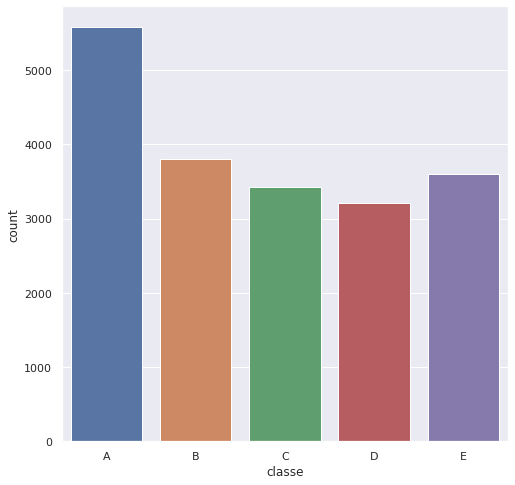

In [13]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="classe", data=df)

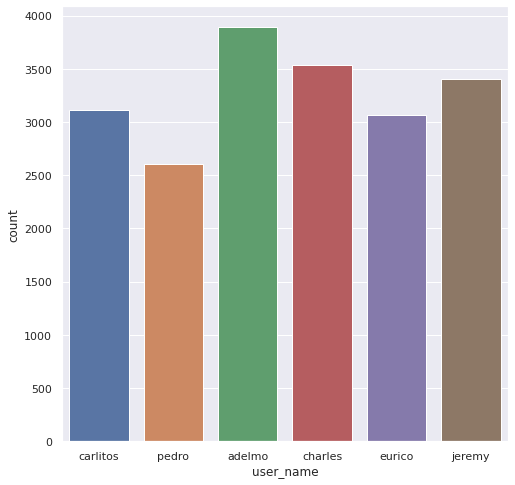

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="user_name", data=df)

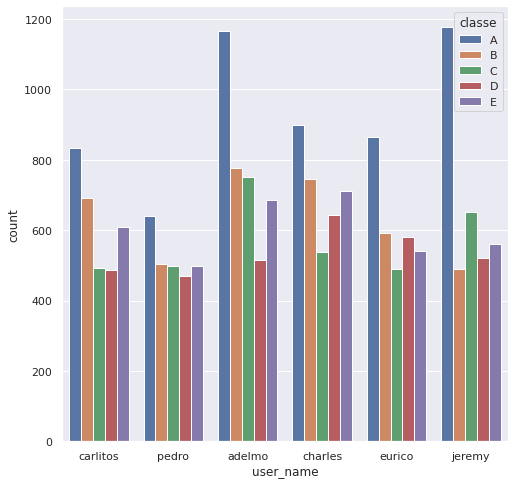

In [15]:
sns.set(rc={'figure.figsize':(8,8)})

sns.countplot(x="user_name", hue='classe', data=df)

### Extracting Time Column


In [16]:
df.rename(columns={'skewness_roll_belt.1':'skewness_pitch_belt'}, inplace=True)

In [17]:
df.drop('cvtd_timestamp', axis = 1, inplace=True)

In [18]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

int64
int64


In [19]:
df['raw_timestamp_part_1'] = df['raw_timestamp_part_1'].astype(str)
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].astype(str)

In [20]:
def concatenate_zero(val):
  if len(val) <6:
    return val + '0'
  else:
    return val

In [21]:
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].apply(concatenate_zero)

In [22]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

object
object


In [23]:
df['raw_timestamp_part_2'].head(10)

0    788290
1    808298
2    820366
3    120339
4    196328
5    304277
6    368296
7    440390
8    484323
9    484434
Name: raw_timestamp_part_2, dtype: object

In [24]:
df["Converted Time"]= df["raw_timestamp_part_1"].str.cat(df['raw_timestamp_part_2'])

In [25]:
df['Converted Time'].head(10)

0    1323084231788290
1    1323084231808298
2    1323084231820366
3    1323084232120339
4    1323084232196328
5    1323084232304277
6    1323084232368296
7    1323084232440390
8    1323084232484323
9    1323084232484434
Name: Converted Time, dtype: object

In [26]:
import datetime

def convert_unix_epoch(epoch_time):
  epoch_time = int(epoch_time)
  dt = datetime.datetime.fromtimestamp(epoch_time/1000000)
  return dt.strftime("%Y-%m-%d %H:%M:%S.%f %p")+'';

In [27]:
convert_unix_epoch(1322489729170626)

'2011-11-28 14:15:29.170626 PM'

In [28]:
df['Converted Time'] = df['Converted Time'].apply(convert_unix_epoch)

In [29]:
df['Converted Time'].iloc[90:100]

90    2011-12-05 11:23:55.600300 AM
91    2011-12-05 11:23:55.620290 AM
92    2011-12-05 11:23:55.672360 AM
93    2011-12-05 11:23:55.692314 AM
94    2011-12-05 11:23:55.692355 AM
95    2011-12-05 11:23:55.732320 AM
96    2011-12-05 11:23:55.740299 AM
97    2011-12-05 11:23:55.812306 AM
98    2011-12-05 11:23:55.816365 AM
99    2011-12-05 11:23:55.908319 AM
Name: Converted Time, dtype: object

In [30]:
def extract_miliseconds(val):
    val = str(val)
    return val[17:26]

In [31]:
df['Converted Seconds'] = df['Converted Time'].apply(extract_miliseconds)

In [32]:
df['Converted Seconds'].iloc[10:20]

10    52.500302
11    52.528316
12    52.560359
13    52.576390
14    52.604281
15    52.644302
16    52.692324
17    52.732306
18    52.740353
19    52.788335
Name: Converted Seconds, dtype: object

In [33]:
df['Converted Seconds'].iloc[90:100]

90    55.600300
91    55.620290
92    55.672360
93    55.692314
94    55.692355
95    55.732320
96    55.740299
97    55.812306
98    55.816365
99    55.908319
Name: Converted Seconds, dtype: object

### DO Data Analysis here

In [34]:
df1 = df.copy()

In [35]:
df1['Converted Seconds']

0        51.788290
1        51.808298
2        51.820366
3        52.120339
4        52.196328
           ...    
19617    37.588376
19618    37.596287
19619    37.636283
19620    37.964299
19621    37.972293
Name: Converted Seconds, Length: 19622, dtype: object

In [36]:
df1.drop(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window', 'Converted Seconds', 'Converted Time',
          'kurtosis_yaw_belt', 'skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm', 'skewness_yaw_forearm','skewness_pitch_belt',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
          'roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x', 'accel_belt_y', 'accel_belt_z','magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 
          'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',   'accel_arm_y',  'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
          'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',  'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
          'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z' ] ,axis=1).columns

Index(['Unnamed: 0', 'kurtosis_roll_belt', 'kurtosis_picth_belt',
       'skewness_roll_belt', 'max_roll_belt', 'max_picth_belt', 'max_yaw_belt',
       'min_roll_belt', 'min_pitch_belt', 'min_yaw_belt',
       'amplitude_roll_belt', 'amplitude_pitch_belt', 'amplitude_yaw_belt',
       'var_total_accel_belt', 'avg_roll_belt', 'stddev_roll_belt',
       'var_roll_belt', 'avg_pitch_belt', 'stddev_pitch_belt',
       'var_pitch_belt', 'avg_yaw_belt', 'stddev_yaw_belt', 'var_yaw_belt',
       'var_accel_arm', 'avg_roll_arm', 'stddev_roll_arm', 'var_roll_arm',
       'avg_pitch_arm', 'stddev_pitch_arm', 'var_pitch_arm', 'avg_yaw_arm',
       'stddev_yaw_arm', 'var_yaw_arm', 'kurtosis_roll_arm',
       'kurtosis_picth_arm', 'kurtosis_yaw_arm', 'skewness_roll_arm',
       'skewness_pitch_arm', 'skewness_yaw_arm', 'max_roll_arm',
       'max_picth_arm', 'max_yaw_arm', 'min_roll_arm', 'min_pitch_arm',
       'min_yaw_arm', 'amplitude_roll_arm', 'amplitude_pitch_arm',
       'amplitude_yaw_arm',

In [37]:
print(df1['kurtosis_roll_belt'].nunique())
print(df1['num_window'].nunique())
print('Number of Empty Values : ', df1['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df1['num_window'].isnull().sum(axis = 0))

396
858
Number of Empty Values :  19216
Number of Empty Values :  0


In [38]:
for i in range(1,865,1):
    val = df1[ (df1['new_window'] == 'yes') & (df1['num_window'] == i) ]['kurtosis_roll_belt']
    for j in val:
      df1.loc[ df1['num_window'] == i , 'kurtosis_roll_belt' ] = j

In [39]:
print(df1['kurtosis_roll_belt'].nunique())
print(df1['num_window'].nunique())
print('Number of Empty Values : ', df1['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df1['num_window'].isnull().sum(axis = 0))

396
858
Number of Empty Values :  10009
Number of Empty Values :  0


In [40]:
for j in df1.drop(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window', 'Converted Seconds', 'Converted Time', 
          'kurtosis_yaw_belt', 'skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm', 'skewness_yaw_forearm','skewness_pitch_belt',
          'roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x', 'accel_belt_y', 'accel_belt_z','magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 
          'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',   'accel_arm_y',  'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
          'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',  'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
          'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z' ] ,axis=1).columns:
  for i in range(1,865,1):
    val = df1[ (df1['new_window'] == 'yes') & (df1['num_window'] == i) ][j]
    for k in val:
      df1.loc[(df1['num_window'] == i), j] = k


In [41]:
df2 = df1.copy()

In [42]:
print('Column Name', '  No of Missing Values')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
Unnamed: 0 		 0
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 10009
kurtosis_picth_belt 		 10009
kurtosis_yaw_belt 		 19216
skewness_roll_belt 		 10009
skewness_pitch_belt 		 19216
skewness_yaw_belt 		 19216
max_roll_belt 		 10009
max_picth_belt 		 10009
max_yaw_belt 		 10009
min_roll_belt 		 10009
min_pitch_belt 		 10009
min_yaw_belt 		 10009
amplitude_roll_belt 		 10009
amplitude_pitch_belt 		 10009
amplitude_yaw_belt 		 10009
var_total_accel_belt 		 10009
avg_roll_belt 		 10009
stddev_roll_belt 		 10009
var_roll_belt 		 10009
avg_pitch_belt 		 10009
stddev_pitch_belt 		 10009
var_pitch_belt 		 10009
avg_yaw_belt 		 10009
stddev_yaw_belt 		 10009
var_yaw_belt 		 10009
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 

In [43]:
df2[ df2['max_roll_belt'].isna()][['max_roll_belt','num_window','roll_belt']]

,max_roll_belt,num_window,roll_belt
0,NaN,11,1.41
1,NaN,11,1.41
2,NaN,11,1.42
76,NaN,15,1.18
77,NaN,15,1.16
...,...,...,...
19603,NaN,863,126.00
19604,NaN,863,125.00
19605,NaN,863,125.00
19606,NaN,863,125.00


In [44]:
for i in df2[df2['max_roll_belt'].isna()]['num_window'].unique():
  max_val = df2[(df2['num_window'] == i)]['roll_belt'].max()
  df2.loc[ (df2['num_window'] == i) ,'max_roll_belt' ] = max_val

In [45]:
df2[ df2['max_roll_belt'].isna()][['max_roll_belt','num_window','roll_belt']]

,max_roll_belt,num_window,roll_belt


In [46]:
empty_max_cols = ['max_roll_belt', 'max_picth_belt',  'max_yaw_belt', 
            'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 
            'max_roll_dumbbell', 'max_picth_dumbbell', 'max_yaw_dumbbell',
            'max_roll_forearm', 'max_picth_forearm', 'max_yaw_forearm'
            ]

empty_min_cols = ['min_roll_belt', 'min_pitch_belt',  'min_yaw_belt', 
            'min_roll_arm', 'min_pitch_arm', 'min_yaw_arm', 
            'min_roll_dumbbell', 'min_pitch_dumbbell', 'min_yaw_dumbbell',
            'min_roll_forearm', 'min_pitch_forearm', 'min_yaw_forearm'
            ]

empty_avg_cols = ['avg_roll_belt', 'avg_pitch_belt',  'avg_yaw_belt', 
            'avg_roll_arm', 'avg_pitch_arm', 'avg_yaw_arm', 
            'avg_roll_dumbbell', 'avg_pitch_dumbbell', 'avg_yaw_dumbbell',
            'avg_roll_forearm', 'avg_pitch_forearm', 'avg_yaw_forearm'
            ]

empty_var_cols = ['var_roll_belt', 'var_pitch_belt',  'var_yaw_belt', 
            'var_roll_arm', 'var_pitch_arm', 'var_yaw_arm', 
            'var_roll_dumbbell', 'var_pitch_dumbbell', 'var_yaw_dumbbell',
            'var_roll_forearm', 'var_pitch_forearm', 'var_yaw_forearm'
            ]

empty_std_cols = ['stddev_roll_belt', 'stddev_pitch_belt',  'stddev_yaw_belt', 
            'stddev_roll_arm', 'stddev_pitch_arm', 'stddev_yaw_arm', 
            'stddev_roll_dumbbell', 'stddev_pitch_dumbbell', 'stddev_yaw_dumbbell',
            'stddev_roll_forearm', 'stddev_pitch_forearm', 'stddev_yaw_forearm'
            ]

empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_pitch_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_pitch_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_pitch_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_pitch_forearm', 'kurtosis_yaw_forearm'
            ]   


empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_picth_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_picth_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_picth_forearm', 'kurtosis_yaw_forearm'
            ]

empty_skew_cols = ['skewness_roll_belt', 'skewness_pitch_belt',  'skewness_yaw_belt', 
            'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm', 
            'skewness_roll_dumbbell', 'skewness_pitch_dumbbell', 'skewness_yaw_dumbbell',
            'skewness_roll_forearm', 'skewness_pitch_forearm', 'skewness_yaw_forearm'
            ]

empty_amplitude_cols = ['amplitude_roll_belt', 'amplitude_pitch_belt',  'amplitude_yaw_belt', 
            'amplitude_roll_arm', 'amplitude_pitch_arm', 'amplitude_yaw_arm', 
            'amplitude_roll_dumbbell', 'amplitude_pitch_dumbbell', 'amplitude_yaw_dumbbell',
            'amplitude_roll_forearm', 'amplitude_pitch_forearm', 'amplitude_yaw_forearm'
            ]   

empty_acceleration_cols = ['var_total_accel_belt', 'var_accel_arm',  'var_accel_dumbbell',
                           'var_accel_forearm']

attributes = [
              'roll_belt','pitch_belt','yaw_belt',
              'roll_arm', 'pitch_arm', 'yaw_arm',
              'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
              'roll_forearm', 'pitch_forearm', 'yaw_forearm',
              ]

attributes2 = ['total_accel_belt',  'total_accel_arm', 'total_accel_dumbbell', 
               'total_accel_forearm']

In [47]:
for j in zip(empty_max_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    max_val = df2[(df2['num_window'] == i)][j[1]].max()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = max_val

In [48]:
for j in zip(empty_min_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    min_val = df2[(df2['num_window'] == i)][j[1]].min()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = min_val

In [49]:
for j in zip(empty_avg_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    mean_val = df2[(df2['num_window'] == i)][j[1]].mean()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = mean_val

In [50]:
for j in zip(empty_var_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    var_val = df2[(df2['num_window'] == i)][j[1]].var()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = var_val

In [51]:
for j in zip(empty_std_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].std()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [52]:
for j in zip(empty_kurtosis_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].kurtosis()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [53]:
for j in zip(empty_skew_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].skew()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [56]:
for j in zip(empty_amplitude_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    val1 = df2[(df2['num_window'] == i)][j[1]].max()
    val2 = df2[(df2['num_window'] == i)][j[1]].min()
    val = abs(val1 - val2)
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = val

In [58]:
for j in zip(empty_acceleration_cols, attributes2):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    val = df2[(df2['num_window'] == i)][j[1]].var()    
    df2.loc[(df2['num_window'] == i),j[0]] = val

In [59]:
print(len(df2))

19622


In [60]:
print('Column Name', '  No of Missing Values\n')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values

Unnamed: 0 		 0
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 22
kurtosis_picth_belt 		 22
kurtosis_yaw_belt 		 24
skewness_roll_belt 		 7
skewness_pitch_belt 		 9
skewness_yaw_belt 		 9
max_roll_belt 		 0
max_picth_belt 		 0
max_yaw_belt 		 0
min_roll_belt 		 0
min_pitch_belt 		 0
min_yaw_belt 		 0
amplitude_roll_belt 		 0
amplitude_pitch_belt 		 0
amplitude_yaw_belt 		 0
var_total_accel_belt 		 1
avg_roll_belt 		 0
stddev_roll_belt 		 1
var_roll_belt 		 1
avg_pitch_belt 		 0
stddev_pitch_belt 		 1
var_pitch_belt 		 1
avg_yaw_belt 		 0
stddev_yaw_belt 		 1
var_yaw_belt 		 1
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 0
magnet_belt_z 		 0
roll_arm 		 0
pitch_arm 		 0
yaw_arm 		 0
total_accel_arm 		 0
var_accel_ar

In [61]:
df2.dropna(axis=0, inplace=True)

In [62]:
print(len(df2))

19598


In [63]:
df2.to_csv('Preprocessed_Exercise.csv')

# Read Data

In [64]:
df2 = pd.read_csv('Preprocessed_Exercise.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,13,14,16,19,22,25,70,73,86,87,88,89,90,91,94,97,100,126,129) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Preparing for machine learning model

In [65]:
#removing as empty isn't needed by ML models
#df1.drop(['Converted Time', 'Converted Seconds', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window'] ,axis=1, inplace = True)

In [66]:
from matplotlib.figure import Figure

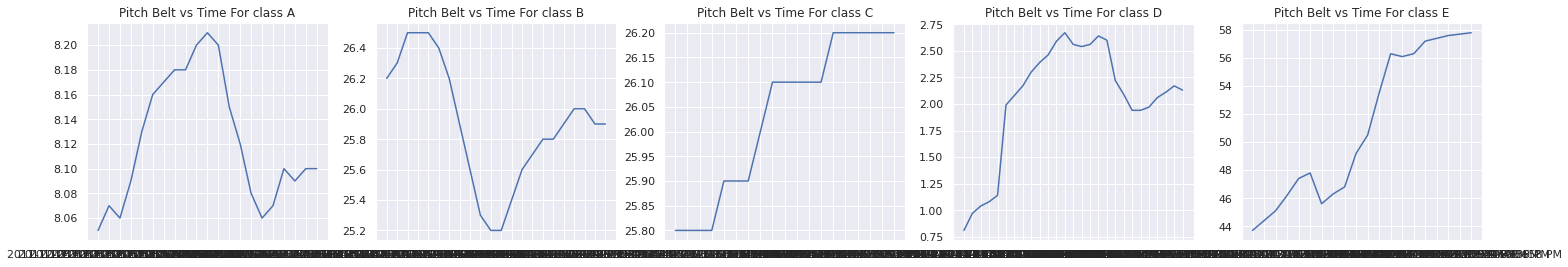

In [67]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

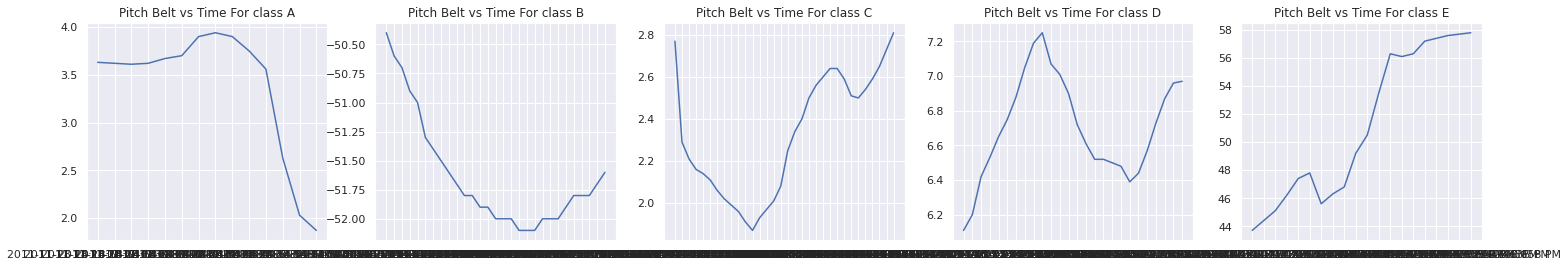

In [68]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 535, 266, 394, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

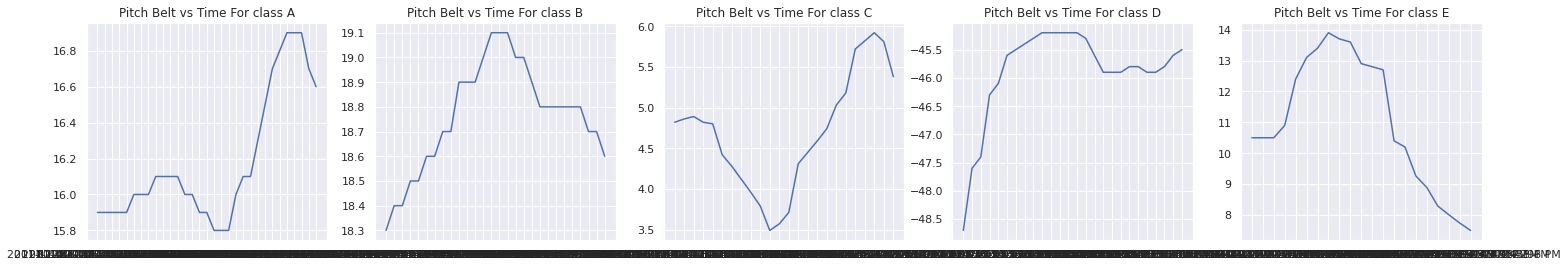

In [69]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 690, 465, 605, 156]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

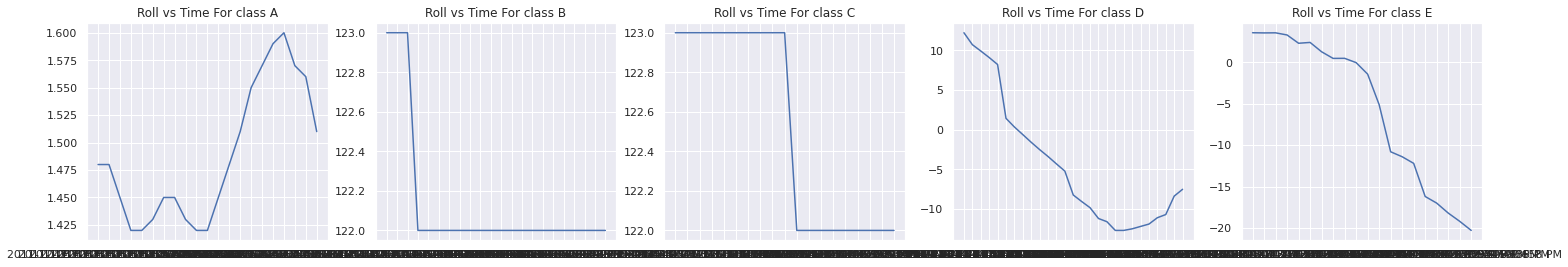

In [70]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

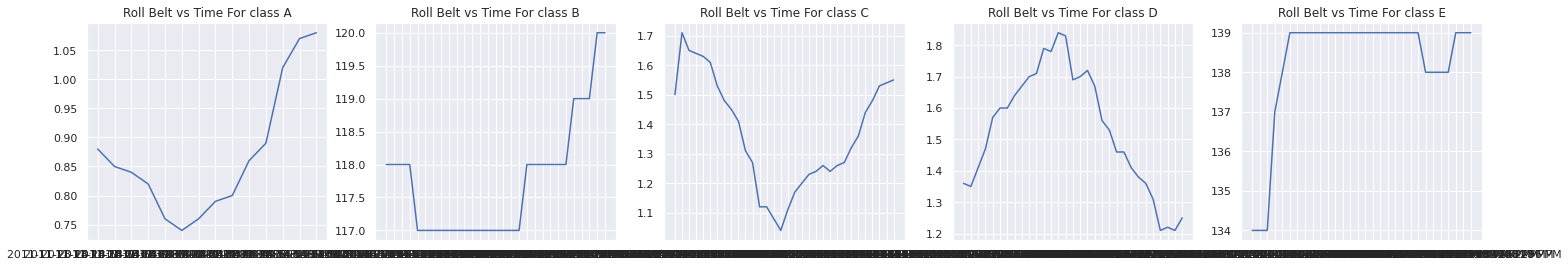

In [71]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 535, 266, 396, 821]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

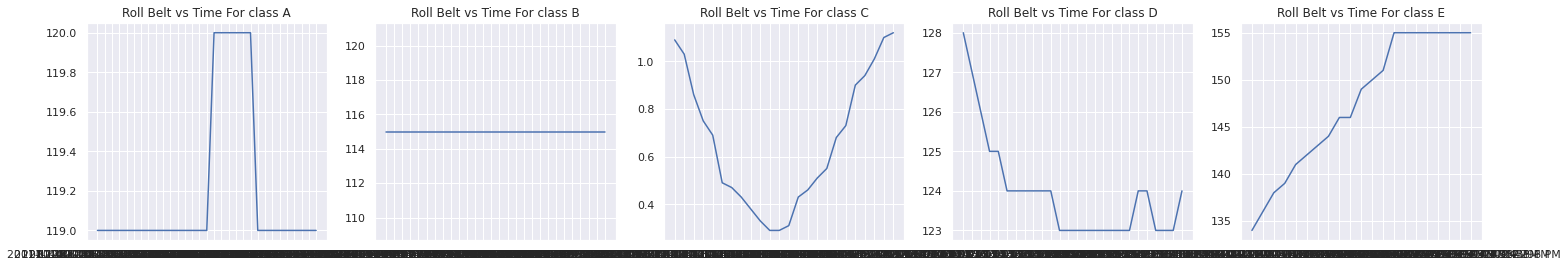

In [72]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 690, 465, 605, 156]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

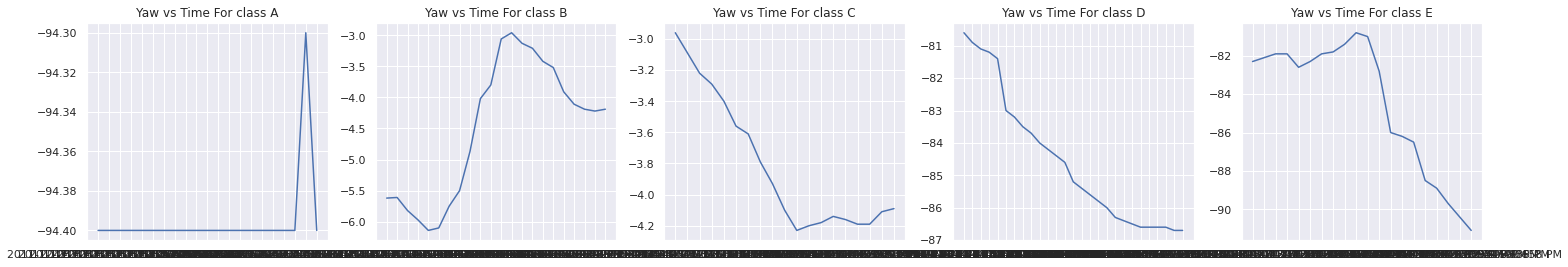

In [73]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

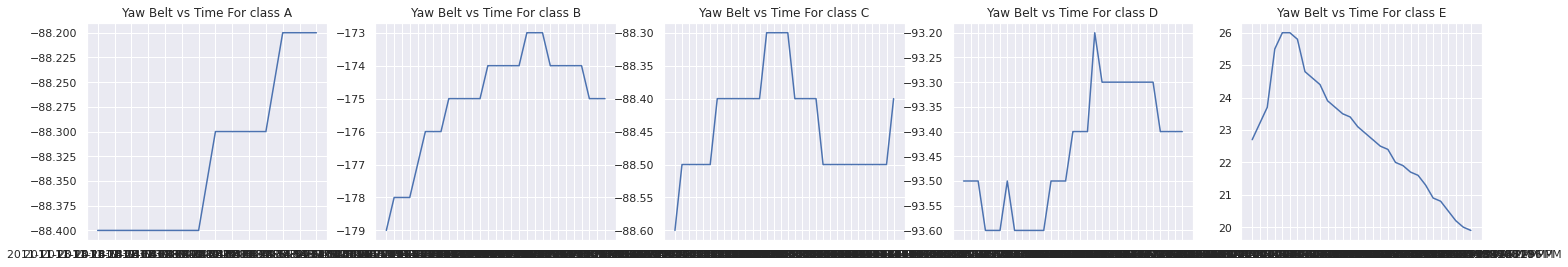

In [74]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 535, 266, 396, 821]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

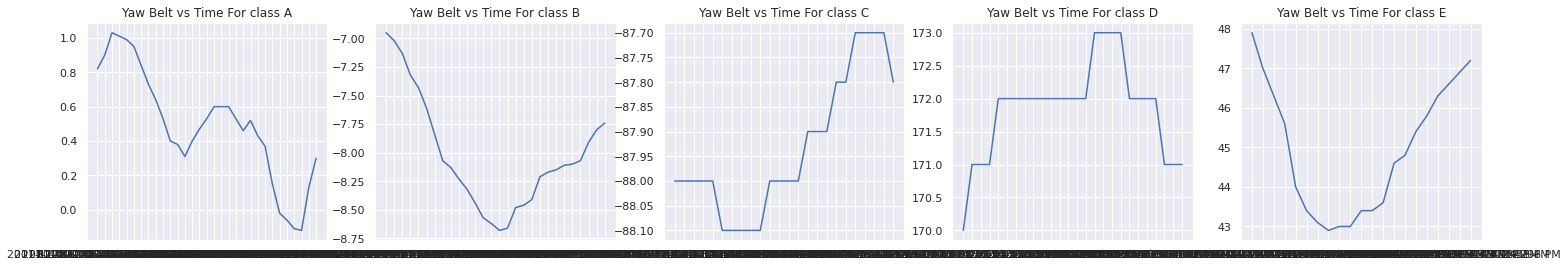

In [75]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 690, 465, 605, 156]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

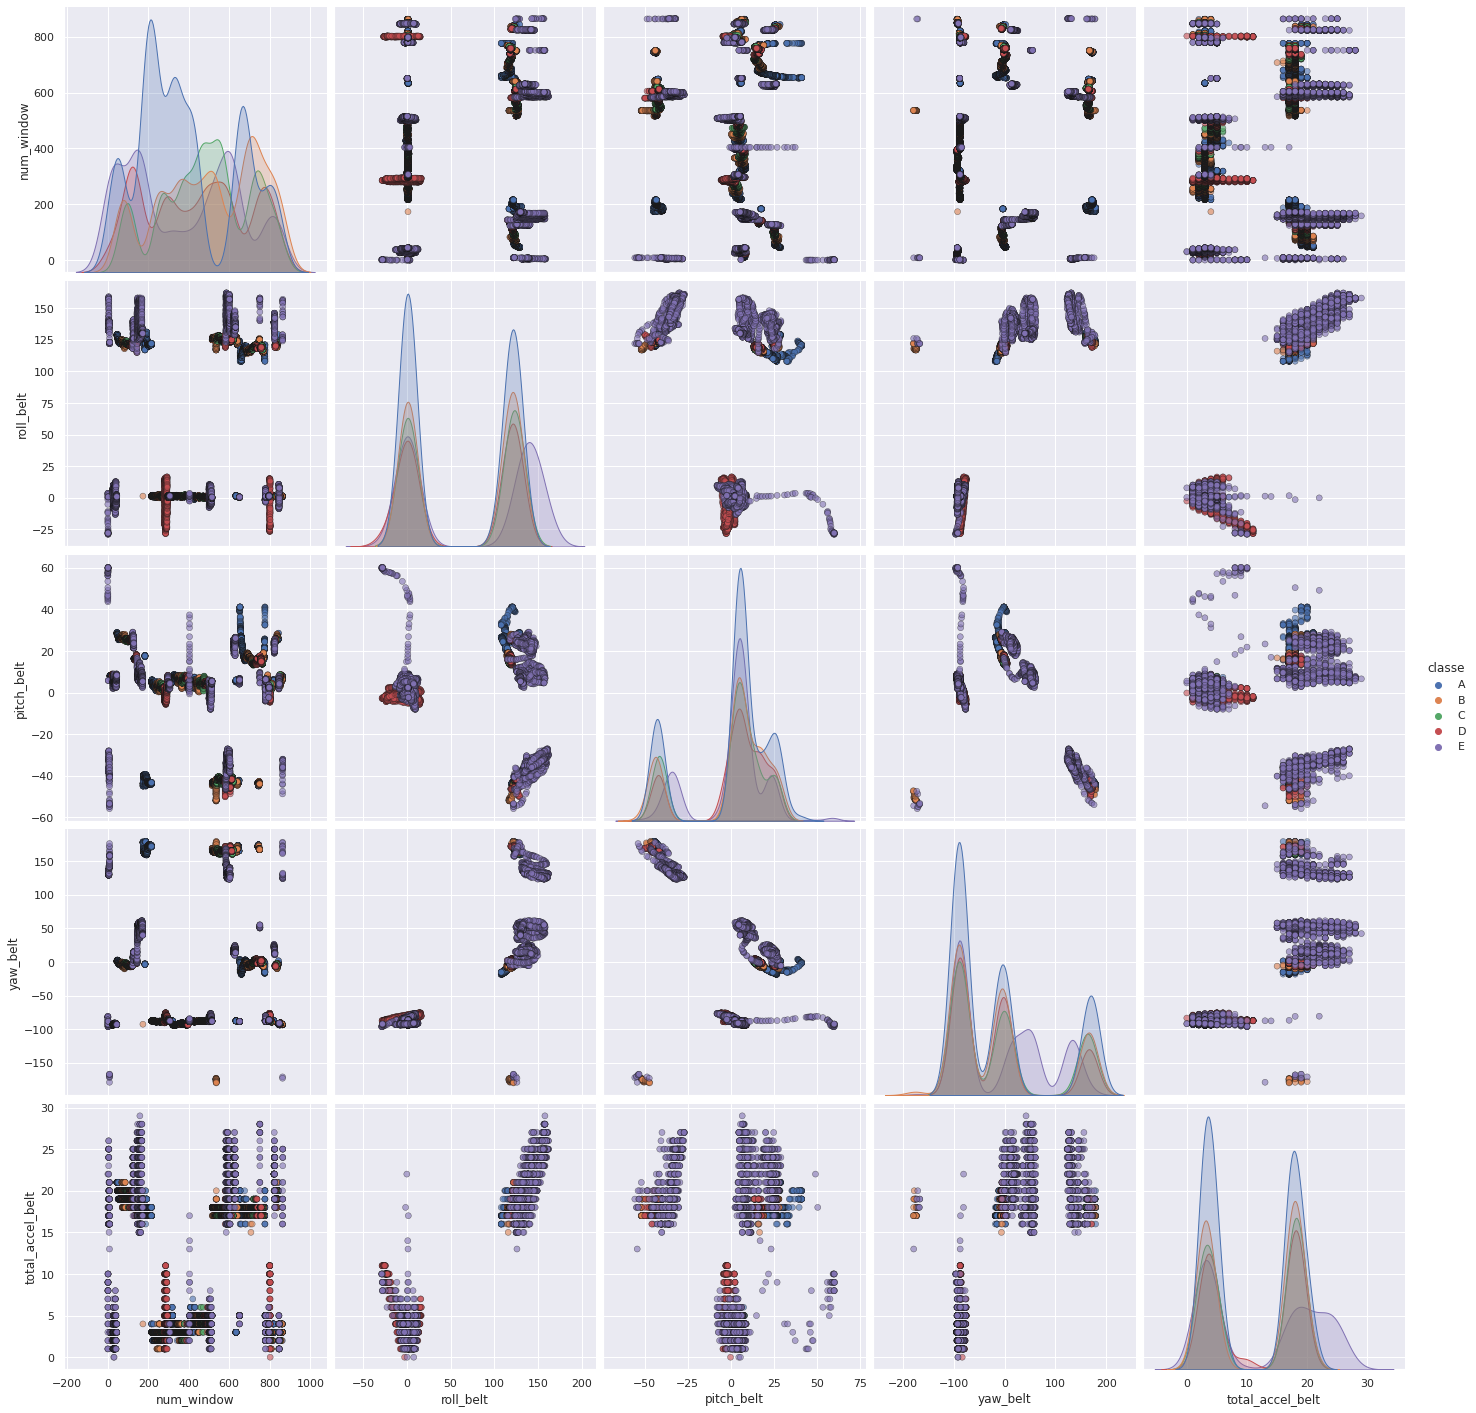

In [76]:
pairplot1=df1.filter(items=['num_window', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt', 'classe'])
sns.pairplot(pairplot1, hue='classe',  plot_kws = {'alpha': 0.6, 'edgecolor': 'k'},height = 4)

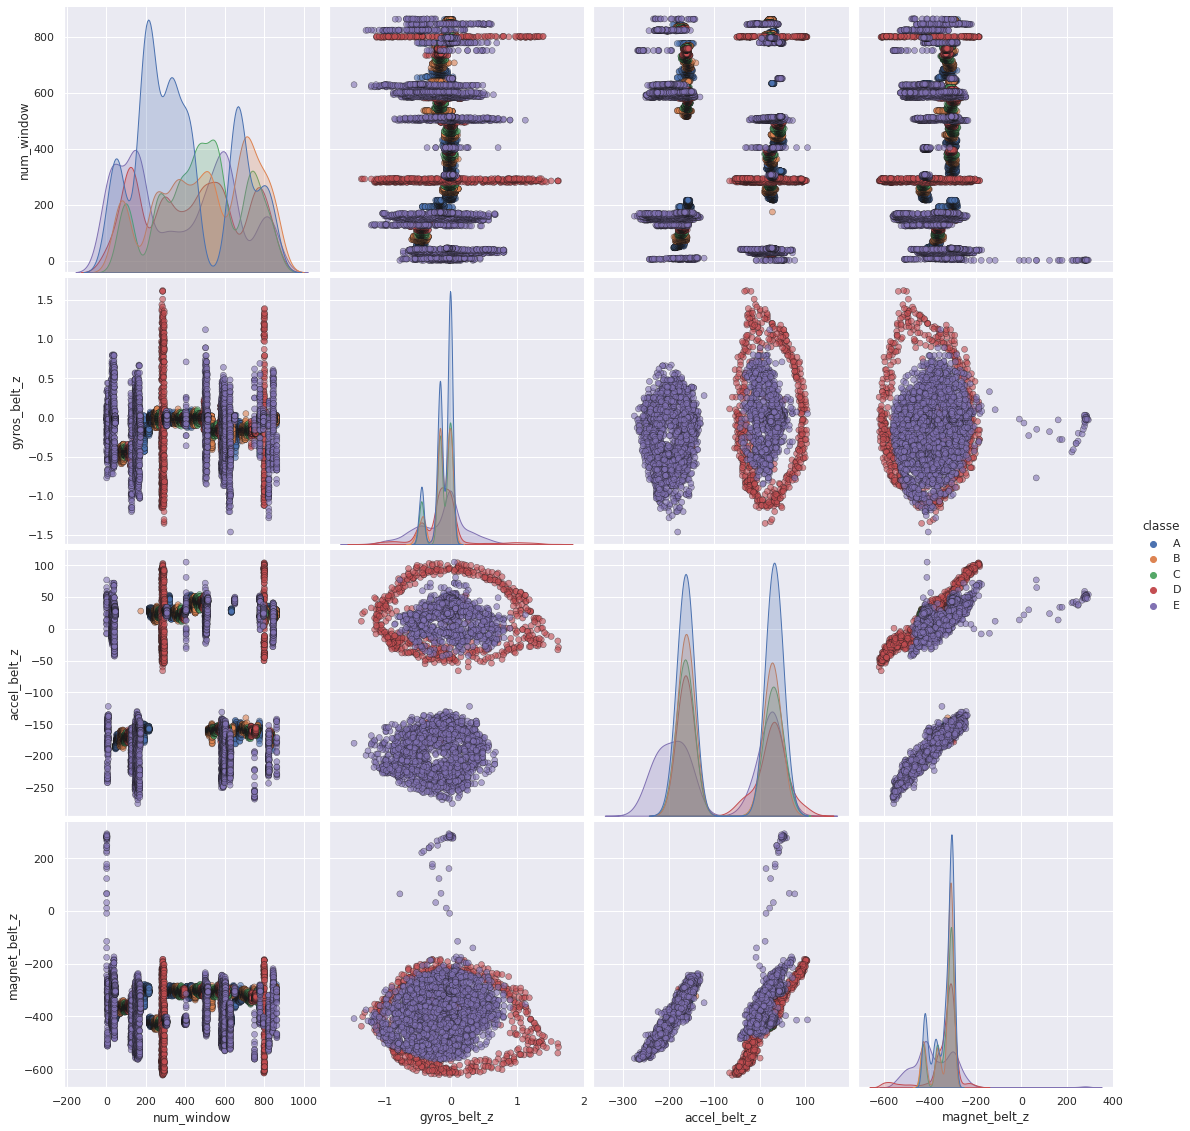

In [77]:
pairplot2=df1.filter(items=['num_window', 'gyros_belt_z', 'accel_belt_z', 'magnet_belt_z', 'classe'])
sns.pairplot(pairplot2, hue='classe',  plot_kws = {'alpha': 0.6, 'edgecolor': 'k'},height = 4)

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, columns=['Gender', 'Home_Stay', 'Movement'])
df.fillna(0, inplace = True)
X = df.drop(['PHQ-Label','Email Address', 'UserId'], axis=1)
y = df['PHQ-Label']
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    KNeighborsClassifier(n_neighbors=3):  "KNN",
    GaussianNB():  "Gausian Naive Bayes",
    DecisionTreeClassifier(): "DecisionTreeClassifier",
    RandomForestClassifier(n_estimators=100): "RandomForestClassifier",
    GradientBoostingClassifier() : "GradientBoostingClassifier",
    LogisticRegression(max_iter=1000) : "LogisticRegression",
    SVC() : "SVC",
    XGBClassifier() : "XGBClassifier",
    LGBMClassifier() : "LGBMClassifier"
}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_train_res, y_train_res, random_state=42)

In [ ]:
for model in models.keys():
    model.fit(X_train, y_train)
    
for model, name in models.items():
    predictions = model.predict(X_test)
    print(name , ' : ',  accuracy_score(y_test, predictions))
    print(classification_report(y_test,predictions))